In [ ]:
'''
This notebook is oriented to the creation of an pandas dataframe builded from GTZAN Music Genre Dataset:
This features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast
This notebook is currently in development phase, so contains a considerably quantity of test code
'''

In [2]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

# Reading Audio Data

print('iniciando...')

audios_blues = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/blues/blues.000*.au')
]

audios_classical = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/classical/classical.000*.au')
]

audios_country = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/country/country.000*.au')
]

audios_disco = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/disco/disco.000*.au')
]

audios_hiphop = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/hiphop/hiphop.000*.au')
]

audios_jazz = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/jazz/jazz.000*.au')
]

audios_metal = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/metal/metal.000*.au')
]

audios_pop = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/pop/pop.000*.au')
]

audios_reggae = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/reggae/reggae.000*.au')
]

audios_rock = [
    librosa.load(p)[0] for p in Path().glob('Datasets/GTZAN_GENRE_COLLECTION/genres/rock/rock.000*.au')
]


print('Ha salio bien')

iniciando...
Ha salio bien


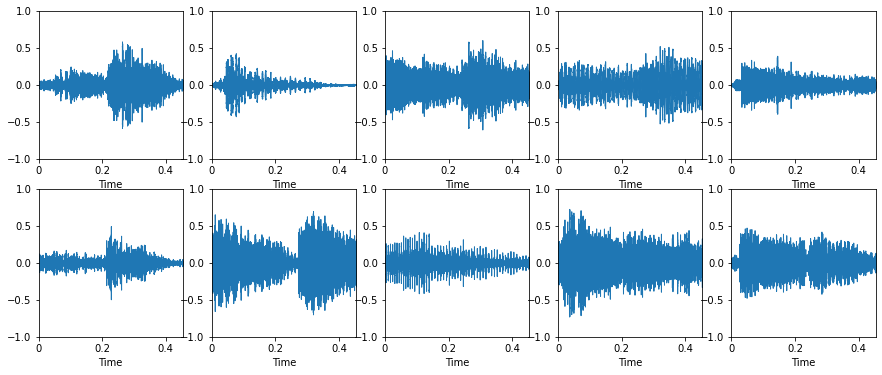

In [3]:
# Representing first 10 waves from the audio

plt.figure(figsize=(15,6))

for i, x in enumerate(audios_blues):
    plt.subplot(2,5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1,1)
    if i == 9:
        break


In [2]:
# Funtions to extracting features and declaration of audio extraction parameters

import sklearn

hop_length = 256
frame_length = 512
sr = 22050
audio_array = audios_blues[0]
# frames = range(len(rmse))
fmin = 36
n_bins = 72
# t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

def get_short_time_energy(audio_array, sr, hop_length, frame_length):
    librosa.get_duration(audio_array, sr)
    energy = np.array([
        sum(abs(audio_array[i:i+frame_length]**2))
        for i in range(0, len(audio_array), hop_length)
    ])
#     frames = range(len(energy))
#     t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
    
    return energy.mean(axis=0)

def get_rmse(audio_array, sr, hop_length, frame_length):
    rmse = librosa.feature.rmse(audio_array, frame_length=frame_length, hop_length=hop_length, center=True)
    rmse = rmse[0]
    return rmse.mean(axis=0)


def get_zcr(audio_array):
    zero_crossings = librosa.zero_crossings(audio_array)
    zero_crossings = sum(zero_crossings)
    return zero_crossings.mean

def get_mfccs(audio_array, sr):
    mfccs = librosa.feature.mfcc(audio_array, sr)
    
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
#     print()
#     print (mfccs.mean(axis=1))
#     print (mfccs.var(axis=1))
#     librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    
    return mfccs

def get_cqt(audio_array, sr, fmin, n_bins, hop_length):
    C = librosa.cqt(audio_array, sr=sr, fmin=fmin, n_bins=n_bins, hop_length=hop_length)
    return C.mean(axis=0).mean(axis=0)

def get_chromagram(audio_array, sr, hop_length):
    chromagram = librosa.feature.chroma_cens(audio_array, sr=sr, hop_length=hop_length)
    return chromagram

def get_spectral_contrast(audio_array, sr):
    spectral_contrast = librosa.feature.spectral_contrast(audio_array, sr=sr)
    return spectral_contrast

280
(72, 2586)


NameError: name 'x' is not defined

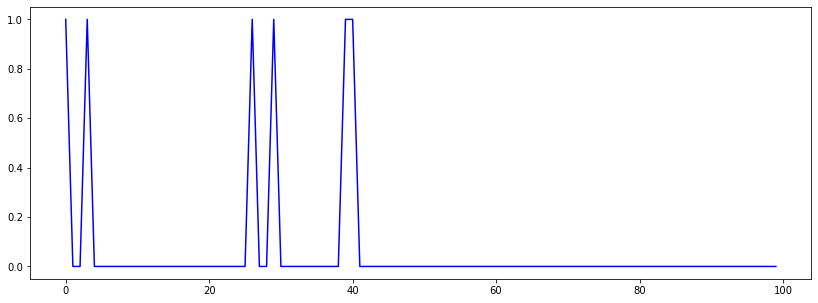

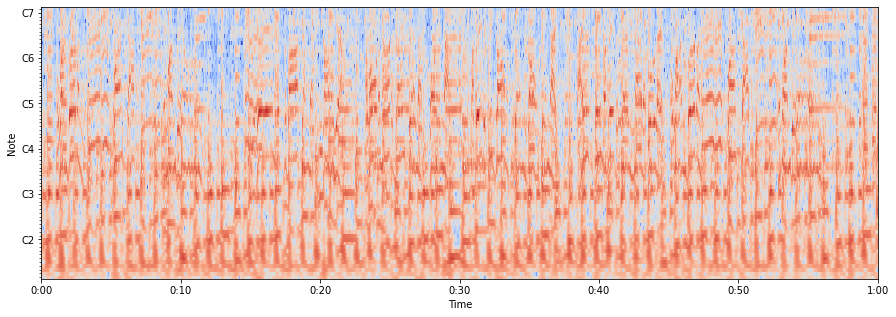

In [55]:
# Visualization of extracted features

rmse = get_rmse(audio_array, sr, hop_length, frame_length)
short_time_energy = get_short_time_energy(audio_array, sr, hop_length, frame_length)

plt.figure(figsize=(14, 5))
# plt.plot(t, rmse, color='b')
# plt.plot(t, short_time_energy, color='r')


zero_crossings = librosa.zero_crossings(audio_array[:2586])
plt.plot(zero_crossings[:100], color='b')
print(sum(zero_crossings))


C = get_cqt(audio_array, sr, fmin, 72, hop_length)
print(cqt.shape)
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

chromagram = get_chromagram(audio_array, sr, hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [15]:
# Creating a pandas data frame with features
def create_features_dictionary(audios_list, label_name):
    short_time_energy = []
    rmse = []
    zcr = []
    mfccs = []
    cqt = []
    spectral_contrast = []
    chromagram = []
    features_array_dict = {
                    'Genre': [],
                    'Energy': [],
                    'RMSE': [],
                    'ZCR': [],
                    'MFCCS': [],
                    'CQT': [],
                    'Spectral_Contrast': [],
                    'Chromagram':[]
                    }
    for audio_array in audios_list:
        short_time_energy = get_short_time_energy(audio_array, sr, hop_length, frame_length)
        rmse = get_rmse(audio_array, sr, hop_length, frame_length)
        zcr = get_zcr(audio_array)
        mfccs = get_mfccs(audio_array, sr)
        cqt = get_cqt(audio_array, sr, fmin, n_bins, hop_length)
        spectral_contrast = get_spectral_contrast(audio_array, sr)
        chromagram = get_chromagram(audio_array, sr, hop_length)
        
        print('TRY:', 1) 
        
        features_array_dict['Genre'].append(label_name)
        features_array_dict['Energy'].append(short_time_energy)
        features_array_dict['RMSE'].append(rmse)
        features_array_dict['ZCR'].append(zcr)
        features_array_dict['MFCCS'].append(mfccs)
        features_array_dict['CQT'].append(cqt)
        features_array_dict['Spectral_Contrast'].append(spectral_contrast)
        features_array_dict['Chromagram'].append(chromagram)
        
    return features_array_dict

def concatenate_features_arrays_dictionaries(dict_one, dict_two):
    
    dict_arrays_length = len(dict_two['Energy'])
    
    for i in range(0, dict_arrays_length):
        dict_one['Genre'].append(dict_two['Genre'][i])
        dict_one['Energy'].append(dict_two['Energy'][i])
        dict_one['RMSE'].append(dict_two['RMSE'][i])
        dict_one['ZCR'].append(dict_two['ZCR'][i])
        dict_one['MFCCS'].append(dict_two['MFCCS'][i])
        dict_one['CQT'].append(dict_two['CQT'][i])
        dict_one['Spectral_Contrast'].append(dict_two['Spectral_Contrast'][i])
        dict_one['Chromagram'].append(dict_two['Chromagram'][i])
    return dict_one

def multiprocess_extraction_df():
    
    features_array_dict = create_features_dictionary(audios_blues, 'Blues') # Initializing
    classical_feature_dict = create_features_dictionary(audios_classical, 'Classical')
    country_feature_dict = create_features_dictionary(audios_country, 'Country')
    disco_feature_dict = create_features_dictionary(audios_disco, 'Disco')
    hiphop_feature_dict = create_features_dictionary(audios_hiphop, 'Hiphop')
    jazz_feature_dict = create_features_dictionary(audios_jazz, 'Jazz')
    metal_feature_dict = create_features_dictionary(audios_metal, 'Metal')
    pop_feature_dict = create_features_dictionary(audios_pop, 'Pop')
    reggae_feature_dict = create_features_dictionary(audios_reggae, 'Reggae')
    rock_feature_dict = create_features_dictionary(audios_rock, 'Rock')

    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, classical_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, country_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, disco_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, hiphop_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, jazz_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, metal_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, pop_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, reggae_feature_dict)
    features_array_dict = concatenate_features_arrays_dictionaries(features_array_dict, rock_feature_dict)
    
    df = pd.DataFrame(features_array_dict, columns = ['Genre', 'Energy', 'RMSE', 'ZCR', 'MFCCS', 'CQT', 'Spectral_Contrast', 'Chromagram'])
    
    return df


df = multiprocess_extraction_df()

df.to_csv('MI_PRIMER_DATAFRAME.csv')

print(df.head(5))
print('impresito')

TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1
TRY: 1

In [13]:
chromagram = get_chromagram(audios_blues[0], sr, hop_length)
print(chromagram.shape)
cqt = get_cqt(audios_blues[0], sr, fmin, n_bins, hop_length)
cqt_mean = cqt.mean(axis=0).mean(axis=0)
print(cqt.shape)
print(cqt_mean)

(12, 2586)
(72, 2586)
(-4.7210443976842666e-05-0.0003847373003636522j)


In [19]:
# NORMALIZATION TESTS



#     Use feature Scaling or normalizacion?
    
#     feature_table = np.vstack((energy, rmse))
    
#     feature_table = np.array([energy, rmse]).reshape(-1, 1)
#     print(feature_table.shape)

#     normalized = sklearn.preprocessing.normalize(feature_table)
    
#     normalized = sklearn.preprocessing.minmax_scale(feature_table)
    
#     print('Longitud tiempo', len(t))
#     print('Longitud energy:', len(energy))
#     print('Longitud rmse:', len(rmse))
#     print(normalized.shape)
    
#     plt.figure(figsize=(14, 5))
#     plt.plot(t, normalized[:2586], color='b')
#     plt.plot(t, normalized[2586:], color='r')
#     plt.legend(('Energy', 'RMSE'))

feature_array = {'Energy': [],
                    'RMSE': [],
                    'ZCR': [],
                    'MFCCS': [],
                    'CQT': [],
                    'Spectral_Contrast': [],
                    'Chromagram':[]
                    }

feature_array['Energy'] = [[0,1,2]]

feature_array.update(feature_array)

print(feature_array['Energy'])

[[0, 1, 2]]


In [59]:

#extracting labels and features

features = df

labelColumn = 'Genre'

labels = np.array(features[labelColumn])

labels.shape


# featureColumsToDrop = ['Genre', 'ZCR', 'MFCCS', 'CQT', 'Spectral_Contrast', 'Chromagram']
featureColumsToDrop = ['Genre']

features = features.drop(featureColumsToDrop, 1)

print(features)

        Energy      RMSE
0    10.130677  0.126542
1     5.927915  0.092873
2    17.180486  0.171918
3    13.435020  0.137898
4     5.467545  0.088730
..         ...       ...
195   0.211590  0.013422
196   2.064012  0.056353
197   0.927374  0.035829
198   0.603118  0.028323
199   0.058679  0.010453

[200 rows x 2 columns]


In [60]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


# print(train_features)

# array_prueba = np.asarray(train_features['Energy'], train_features['CQT'])

# print(train_features['Energy'].shape)
# print(train_features['RMSE'].shape)

# print(train_features)
# print(train_labels)

print(train_features)
print(train_features.shape)

print("ENERGY")
# print(type(train_features))
# print(type(train_features['Energy'][0]))
# print(type(train_features['Energy'][0][0]))


# print("RMSE") 
# print(train_features['RMSE'].shape)
# print(type(train_features['RMSE']))



Training Features Shape: (150, 2)
Training Labels Shape: (150,)
Testing Features Shape: (50, 2)
Testing Labels Shape: (50,)
       Energy      RMSE
114  0.815965  0.031101
173  1.272237  0.043132
5    7.521608  0.101118
126  1.412548  0.038389
117  1.242433  0.036796
..        ...       ...
106  0.743089  0.032996
14   3.692675  0.064832
92   2.819895  0.061262
179  0.255978  0.018520
102  1.081813  0.043287

[150 rows x 2 columns]
(150, 2)
ENERGY


In [61]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 41)

# Train the model on training data
rf.fit(train_features, train_labels)


RandomForestClassifier(n_estimators=1000, random_state=41)

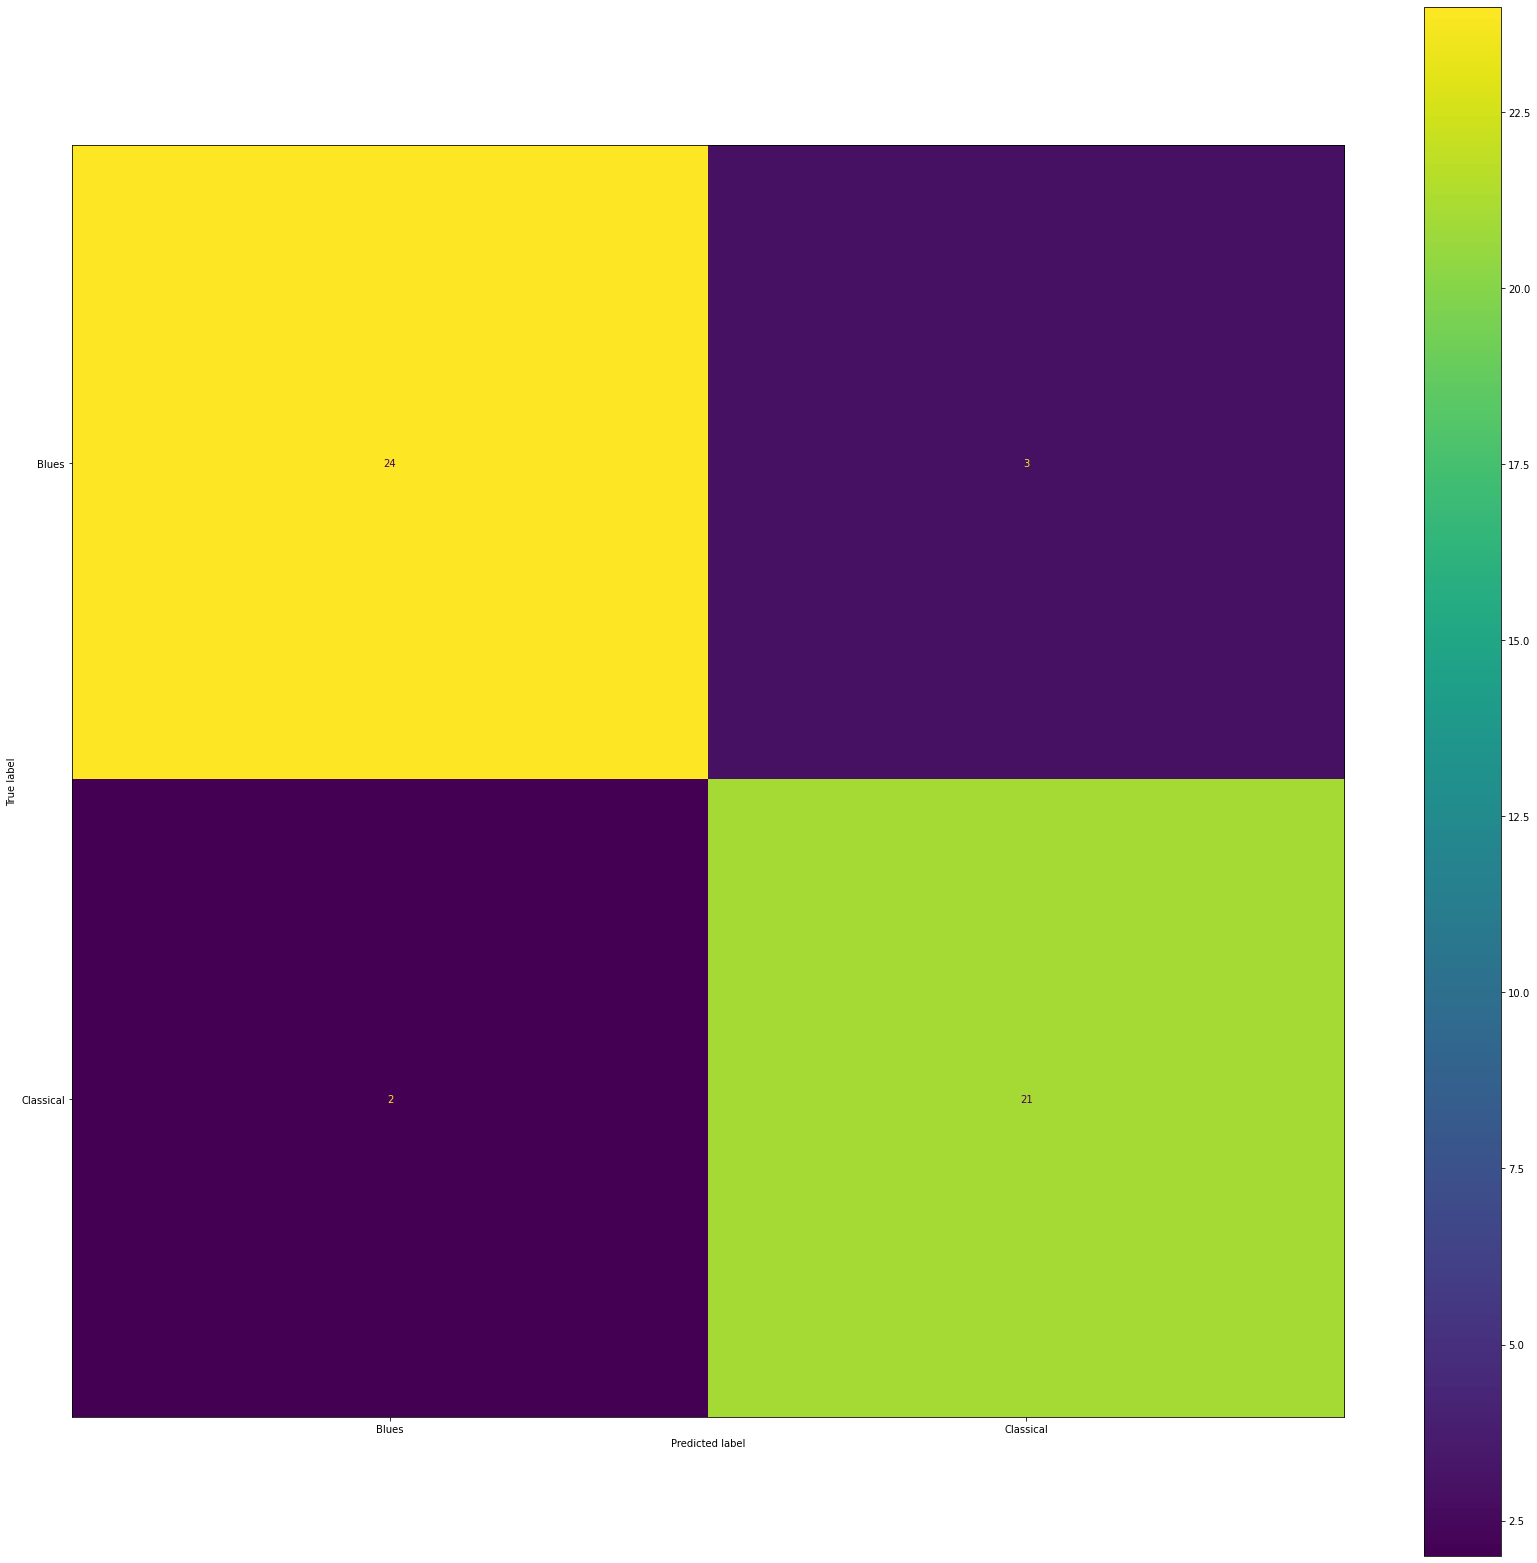

In [62]:
from sklearn.metrics import plot_confusion_matrix

predictions = rf.predict(test_features)

plot_confusion_matrix(rf, test_features, test_labels)
fig = plt.gcf()
fig.set_size_inches(28.5, 28.5)
plt.show()